### Feature Engineering

In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import pickle
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, Imputer

In [2]:
# import preprocessed training data
df=pd.read_pickle('./data/train.pkl')

In [3]:
df.shape

(55321, 31)

In [4]:
#check that the water amount matches the pump classification 
df[(df['amount_tsh']== 0) & (df['status_group'] =='functional')]

#there are a number of wells which are classified as functional but have no water output 

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type_class,extraction_type_group,funder,gps_height,id,installer,latitude,lga,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity_group,recorded_by,region,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type_group,wpt_name
1,0.0,Lake Victoria,2010,2013-03-06,2,gravity,gravity,Grumeti,1399,8776,GRUMETI,-2.147466e+00,Serengeti,34.698766,wug,user-group,0,never pay,280,good,insufficient,GeoData Consultants Ltd,Mara,surface,rainwater harvesting,functional,Nyamara,Natta,soft,communal standpipe,Zahanati
4,0.0,Lake Victoria,0,2011-07-13,1,gravity,gravity,Action In A,0,19728,Artisan,-1.825359e+00,Karagwe,31.130847,other,other,0,never pay,0,good,seasonal,GeoData Consultants Ltd,Kagera,surface,rainwater harvesting,functional,Kyanyamisa,Nyakasimbi,soft,communal standpipe,Shuleni
9,0.0,Lake Victoria,0,2011-08-03,1,handpump,nira/tanira,Isingiro Ho,0,46144,Artisan,-1.257051e+00,Karagwe,30.626991,vwc,user-group,0,never pay,0,good,enough,GeoData Consultants Ltd,Kagera,groundwater,shallow well,functional,Mkonomre,Kaisho,soft,hand pump,Kwapeto
10,0.0,Wami / Ruvu,2011,2011-02-20,43,submersible,submersible,Private,62,49056,Private,-7.034139e+00,Mkuranga,39.209518,private operator,commercial,0,never pay,345,salty,enough,GeoData Consultants Ltd,Pwani,groundwater,borehole,functional,Mizugo,Tambani,salty,other,Mzee Hokororo
12,0.0,Internal,0,2012-10-14,2,handpump,nira/tanira,World Vision,0,36957,World vision,-3.290194e+00,Maswa,33.798106,wug,user-group,0,other,0,good,enough,GeoData Consultants Ltd,Shinyanga,groundwater,shallow well,functional,Nkilifa,Busilili,soft,hand pump,Pamba
13,0.0,Pangani,2009,2013-03-15,7,gravity,gravity,Lawatefuka Water Supply,1368,50495,Lawatefuka water sup,-3.181783e+00,Siha,37.092574,water board,user-group,0,monthly,1,good,enough,GeoData Consultants Ltd,Kilimanjaro,groundwater,spring,functional,Omarini,Siha Kaskazini,soft,communal standpipe,Kwa John Izack Mmari
14,0.0,Internal,0,2012-10-20,6,handpump,nira/tanira,Biore,0,53752,WEDECO,-3.629333e+00,Meatu,34.364073,wug,user-group,0,never pay,0,good,enough,GeoData Consultants Ltd,Shinyanga,groundwater,shallow well,functional,Mwabasabi,Nkoma,soft,hand pump,Mwabasabi
15,0.0,Lake Tanganyika,1991,2011-08-04,2,handpump,swn 80,Rudep,1645,61848,DWE,-8.274962e+00,Sumbawanga Rural,31.444121,vwc,user-group,0,never pay,200,good,enough,GeoData Consultants Ltd,Rukwa,groundwater,borehole,functional,Tunzi,Mkowe,soft,hand pump,Kwa Juvenal Ching'Ombe
21,0.0,Lake Victoria,0,2013-02-10,1,handpump,swn 80,Dwsp,0,6091,DWE,-2.000000e-08,Bariadi,0.000000,wug,user-group,0,unknown,0,unknown,unknown,GeoData Consultants Ltd,Shinyanga,groundwater,shallow well,functional,Ibabachegu,Ikungulyabashashi,unknown,hand pump,Muungano
24,0.0,Lake Tanganyika,2009,2013-01-21,3,gravity,gravity,African Development Bank,1645,51058,DWE,-4.495568e+00,Kigoma Rural,29.747066,vwc,user-group,0,unknown,156,good,enough,GeoData Consultants Ltd,Kigoma,groundwater,spring,functional,Msasa,Mkigo,soft,improved spring,Kamsasa


There seems to have been some mislabelling where functional pumps are not pumping water so amount_tsh will be dropped

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55321 entries, 0 to 59399
Data columns (total 31 columns):
amount_tsh               55321 non-null float64
basin                    55321 non-null object
construction_year        55321 non-null int64
date_recorded            55321 non-null object
district_code            55321 non-null object
extraction_type_class    55321 non-null object
extraction_type_group    55321 non-null object
funder                   55321 non-null object
gps_height               55321 non-null int64
id                       55321 non-null int64
installer                55321 non-null object
latitude                 55321 non-null float64
lga                      55321 non-null object
longitude                55321 non-null float64
management               55321 non-null object
management_group         55321 non-null object
num_private              55321 non-null int64
payment_type             55321 non-null object
population               55321 non-null int64


### Geospatial Clustering



In [6]:
#subset the geospacial features
geo=df[['latitude','longitude']]

In [8]:
#initialize HDBScan 
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 100,      # analogous to min_samples
                            gen_min_span_tree = True)  # saves our dendrogram for later!

h_cluster.fit(np.radians(geo)) #get the radian values of the lats and longs for the HDBScan hversine metric to work

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
    prediction_data=False)

In [ ]:
h_cluster.fit(np.radians(geo)) #get the radian values of the lats and longs for the HDBScan hversine metric to work

In [9]:
#extract the labels 
labels = h_cluster.labels_

print(h_cluster.labels_)

[-1 -1 -1 ... -1 26 -1]


In [10]:
#get only the unique values from the labels
set(labels)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55}

In [11]:
# create a cluster column
df['cluster'] = labels

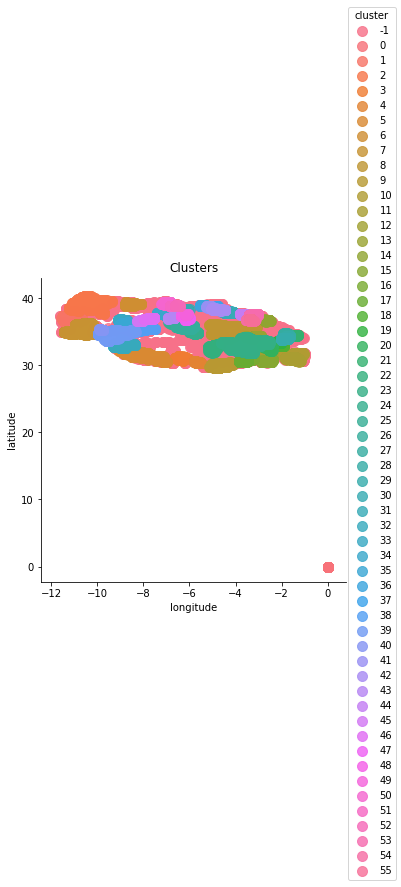

In [17]:
# Attrib Keerthi Kishore 
sns.lmplot('latitude', # Horizontal axis
           'longitude', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="cluster", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Clusters')


# Set x-axis label
plt.xlabel('longitude')

# Set y-axis label
plt.ylabel('latitude');

In [ ]:
df.head(6)

In [32]:
#convert cluster to categorical
df['cluster']=df.cluster.astype('str')

### Fill missing values 

In [18]:
#impute the missing values with median
imp=Imputer(missing_values=0, strategy="median" )
df["population"]=imp.fit_transform(df[["population"]])

In [19]:
#save a pickle before dummying for later use 
df.to_pickle('./data/pre_dum_pickle.pkl')

In [27]:
df=pd.read_pickle('./data/pre_dum_pickle.pkl')

In [28]:
# finalize the features to us 
to_drop=['funder','subvillage','amount_tsh','construction_year','date_recorded',
      'extraction_type_group','id','lga','management',
      'num_private','recorded_by','region','source_class',
     'source_class','ward','wpt_name','latitude','longitude']

df.drop(to_drop,axis=1,inplace=True)

df.head(5)

,basin,district_code,extraction_type_class,gps_height,installer,management_group,payment_type,population,quality_group,quantity_group,source_type,status_group,water_quality,waterpoint_type_group,cluster
0,Lake Nyasa,5,gravity,1390,Roman,user-group,annually,109.0,good,enough,spring,functional,soft,communal standpipe,-1
1,Lake Victoria,2,gravity,1399,GRUMETI,user-group,never pay,280.0,good,insufficient,rainwater harvesting,functional,soft,communal standpipe,-1
2,Pangani,4,gravity,686,World vision,user-group,per bucket,250.0,good,enough,dam,functional,soft,communal standpipe,-1
3,Ruvuma / Southern Coast,63,submersible,263,UNICEF,user-group,never pay,58.0,good,dry,borehole,non functional,soft,communal standpipe,2
4,Lake Victoria,1,gravity,0,Artisan,other,never pay,150.0,good,seasonal,rainwater harvesting,functional,soft,communal standpipe,11


#### Reduce dimensionality

In [30]:
#select only the top 10 installers as unique 
install_10 = df.installer.value_counts(normalize=True).head(10).index.tolist()  


df['installer'] = [type_ if type_ in install_10
                      else "OTHER" for type_ in df['installer']]

In [33]:
df.installer.value_counts()

OTHER                 29154
DWE                   17349
Government             1825
RWE                    1205
DANIDA                 1050
KKKT                    898
Commu                   894
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64

In [34]:
#select all categorical variables other than the dependent variable for dummying
dummy= list(df.select_dtypes(exclude=np.number).columns)
dummy.remove('status_group')
df.shape

(55321, 15)

In [35]:
#create dummies

df_model_n = pd.get_dummies(df,columns=dummy,drop_first=False)

df_model_n.shape

(55321, 149)

In [ ]:
df_model_n.head(5)

In [ ]:
df_model_n.to_pickle('./data/dummied_122.pkl')